In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats

np.random.seed(27);
torch.manual_seed(27);

In [2]:
DEVICE = 'cuda'

## Torus model

In [3]:
def model(v, center = np.array([0.6, 0.8])):
    a, b, c = v
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, v, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

In [4]:
v0 = np.array([0.57, 0.8, 1.0])
obs0 = model(v0)  # Using Asimov data

In [5]:
prior = swyft.Prior(lambda u: u, 3)

In [6]:
simulator = swyft.Simulator(model, sim_shapes = dict(x=(3,)))
store = swyft.MemoryStore(3, simulator = simulator)

Creating new store.


In [7]:
marginals_1d = [0, 1, 2]
bound = None
for N in [5000, 5000, 5000, 5000, 10000]:
    task = swyft.Task(N, prior, store, simhook = noise, bound = bound)
    task.simulate()
    task.add(marginals_1d, device = DEVICE)
    task.train(marginals_1d)
    bound = task.truncate(marginals_1d, obs0)
    
marginals_2d = [(0, 1), (0, 2), (1, 2)]
task.add(marginals_2d, device = DEVICE)
task.train(marginals_2d)

Store: Adding 4985 new samples to simulator store.
Training: lr=1e-06, Epoch=30, VL=1.9361
Bounds: Truncating...
Bounds: ...done. New volue is V=0.1197
Store: Adding 4338 new samples to simulator store.
Training: lr=0.0001, Epoch=30, VL=2.663
Bounds: Truncating...
Bounds: ...done. New volue is V=0.02499
Store: Adding 4108 new samples to simulator store.
Training: lr=0.0001, Epoch=30, VL=3.124
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01427
Store: Adding 2261 new samples to simulator store.
Training: lr=1e-06, Epoch=28, VL=3.2979
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01437
Store: Adding 5195 new samples to simulator store.
Training: lr=1e-06, Epoch=30, VL=3.2763
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01443
Training: lr=1e-05, Epoch=30, VL=2.3389


In [8]:
samples = task.sample(1000000, obs0)

(<Figure size 1080x1080 with 9 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='1'>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='0', ylabel='2'>, <AxesSubplot:xlabel='1'>,
         <AxesSubplot:xlabel='2'>]], dtype=object))

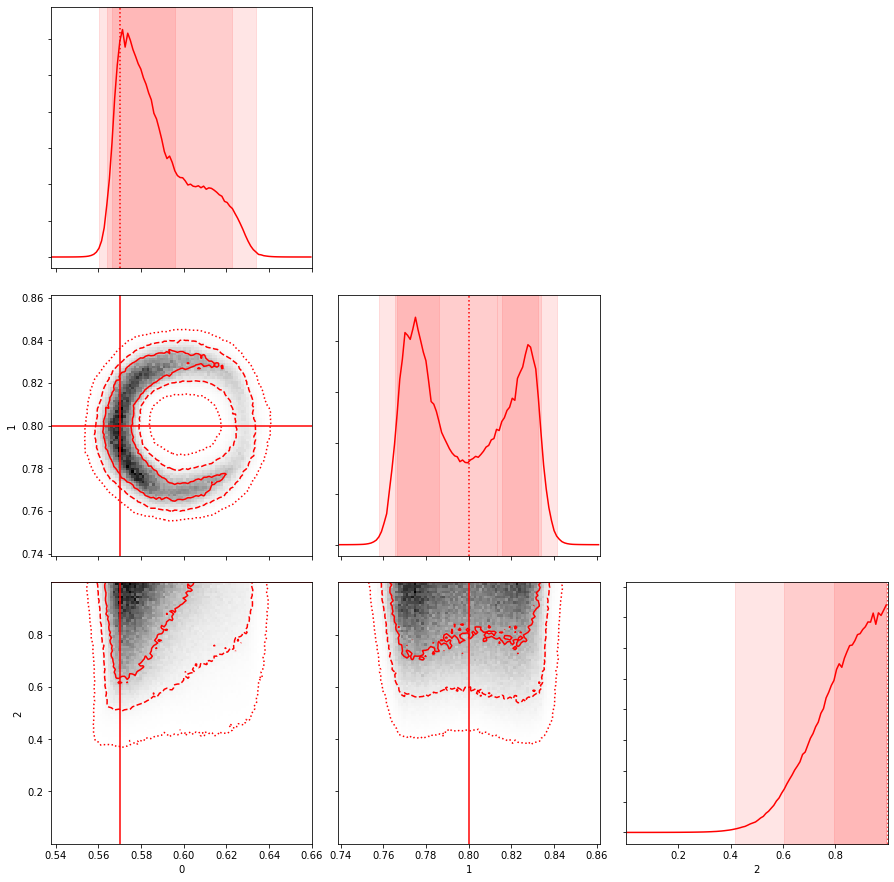

In [9]:
swyft.corner(samples, [0, 1, 2], color='r', figsize = (15,15), truth=v0)